# Deliveroo Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company Deliveroo offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format #displays complete data without e to the power format
# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
df = pd.read_csv('DeliverooOrders.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
# df.info()
df.shape

(1898, 9)

#### Observations: Data has 1898 rows and 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Write your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: orderid, customerid,delivery time,food preparation time are integers. restaurant name, cuisine type, day of the week and ratings are object and cost of the order is float


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:There are no null values


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
df.describe()


,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1898.00,1898.00,1898.00,1898.00,1898.00
mean,1477495.50,171168.48,16.50,27.37,24.16
std,548.05,113698.14,7.48,4.63,4.97
min,1476547.00,1311.00,4.47,20.00,15.00
25%,1477021.25,77787.75,12.08,23.00,20.00
50%,1477495.50,128600.00,14.14,27.00,25.00
75%,1477969.75,270525.00,22.30,31.00,28.00
max,1478444.00,405334.00,35.41,35.00,33.00


#### Observations: Minimum time taken for food preparation is 20 mins.Average time taken for food preparation is 27 min and 22.2 seconds.(0.37*60). Maximum time taken for food preparation is 35 mins.


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here
not_rated = 0
for rate in df.rating:
  if rate == "Not given":
    not_rated = not_rated + 1
  else:
    continue
# rated = df.rating.count() - not_rated
print(f"The number of orders are not rated are {not_rated}")
# print(rated)

The number of orders are not rated are 736


In [ ]:
df[df.rating == "Not given"].count()

,0
order_id,736
customer_id,736
restaurant_name,736
cuisine_type,736
cost_of_the_order,736
day_of_the_week,736
rating,736
food_preparation_time,736
delivery_time,736


#### Observations: The number of orders are not rated are 736



### Exploratory Data Analysis (EDA)

(Generally, histograms, boxplots, countplots, barplot, pairplots, scatterplots, correlation matrix, pointplot, striplot etc. are used for univariate exploration.)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions.  [9 marks]

array([[<Axes: title={'center': 'order_id'}>,
        <Axes: title={'center': 'customer_id'}>],
       [<Axes: title={'center': 'cost_of_the_order'}>,
        <Axes: title={'center': 'food_preparation_time'}>],
       [<Axes: title={'center': 'delivery_time'}>, <Axes: >]],
      dtype=object)

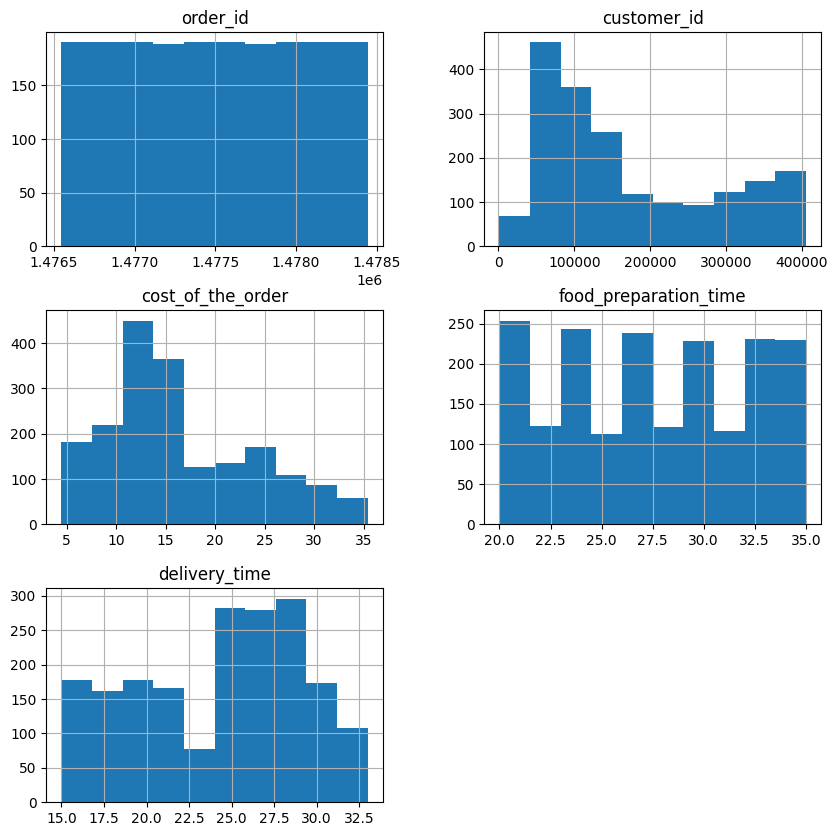

In [ ]:
# Write the code here
df.hist(figsize= (10,10))

Text(0, 0.5, 'number of orders')

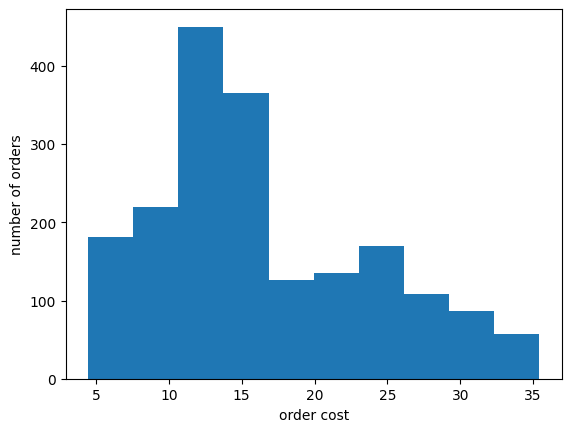

In [ ]:
# Write the code here
plt.hist(df.cost_of_the_order,bins=10)
plt.xlabel('order cost')
plt.ylabel('number of orders')


Observations: Cost of the order table is rightly skewed where lower cost orders are more common

Text(0, 0.5, 'number of orders')

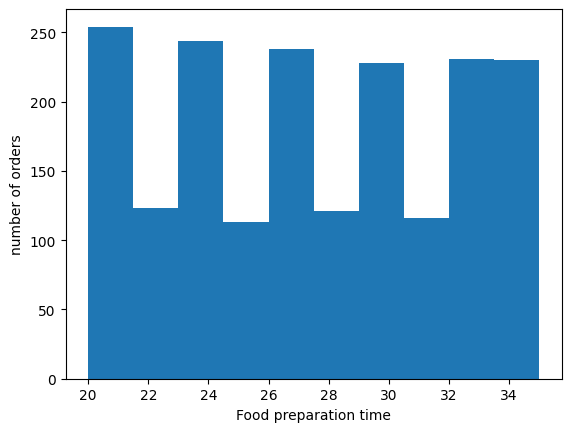

In [ ]:
# Write the code here
plt.hist(df.food_preparation_time,bins=10)
plt.xlabel('Food preparation time')
plt.ylabel('number of orders')

Observations: Food preparation time is uniformly distributed with little variation because of number of orders.

Text(0, 0.5, 'number of orders')

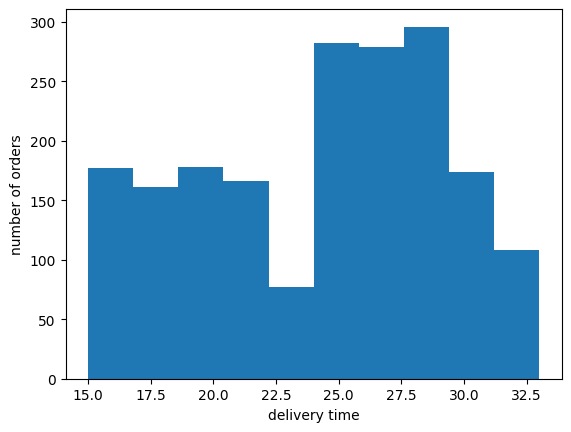

In [ ]:
# Write the code here
plt.hist(df.delivery_time,bins=10)
plt.xlabel('delivery time')
plt.ylabel('number of orders')

Observations: delivery time is showing bimodal distribution, where we have two peaks in histogram, suggesting maybe the delivery made at the peak traffic hours.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code here
print(df['restaurant_name'].value_counts(ascending=False).head(5))

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations:The Shake Shack restaurant is more popular among the customer



### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Write the code here
data = df[df.day_of_the_week == "Weekend"]
# data.head(5)
print(data['cuisine_type'].value_counts(ascending=False).head(1))

cuisine_type
American    415
Name: count, dtype: int64


#### Observations: American cuisine is more popular.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here
ordercost = df['cost_of_the_order']>20
percent = (df[ordercost].count()/df['cost_of_the_order'].count())*100
print(percent)

order_id                29.24
customer_id             29.24
restaurant_name         29.24
cuisine_type            29.24
cost_of_the_order       29.24
day_of_the_week         29.24
rating                  29.24
food_preparation_time   29.24
delivery_time           29.24
dtype: float64


#### Observations: 29.24% orders cost is more than 20$


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here
df['delivery_time'].mean()


24.161749209694417

In [ ]:
(0.161749209694417 * 60)

9.70495258166502

#### Observations:mean delivery time = 24 mins and 9.7 sec = 24 mins 10 sec(approx)



### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
df['customer_id'].value_counts(ascending=False).head(3)

,count
customer_id,
52832,13
47440,10
83287,9


In [ ]:
# customer = df[df['customer_id'] == 52832]
# print(customer)

#### Observations: higest number of order by one customer is 13


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


<Axes: xlabel='day_of_the_week', ylabel='delivery_time'>

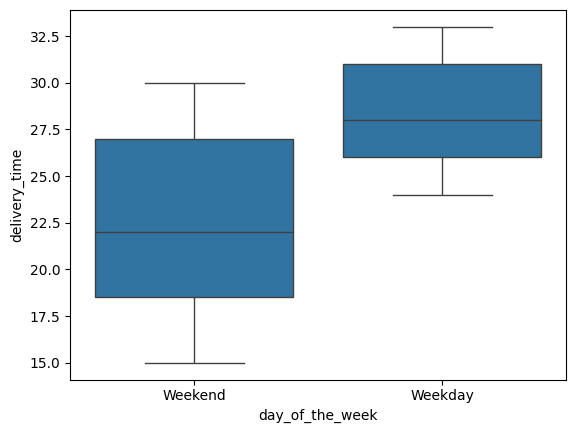

In [ ]:
# Write the code here
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df)

<Axes: xlabel='day_of_the_week', ylabel='food_preparation_time'>

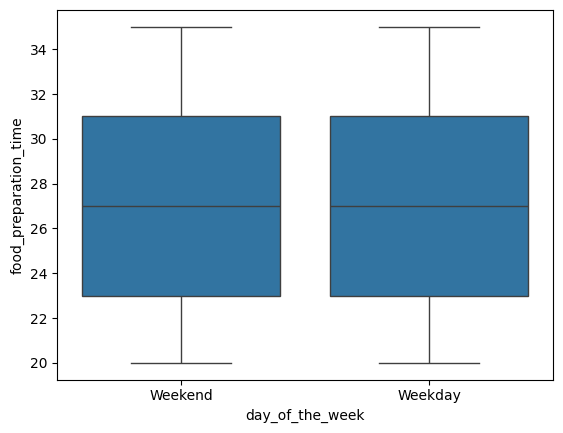

In [ ]:
sns.boxplot(x='day_of_the_week', y='food_preparation_time', data=df)

<Axes: xlabel='day_of_the_week', ylabel='cost_of_the_order'>

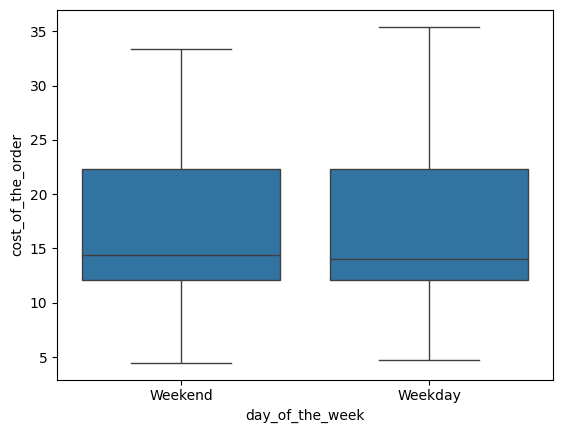

In [ ]:
sns.boxplot(x='day_of_the_week', y='cost_of_the_order', data=df)

Text(0.5, 1.0, 'Cost of Orders by Cuisine Type')

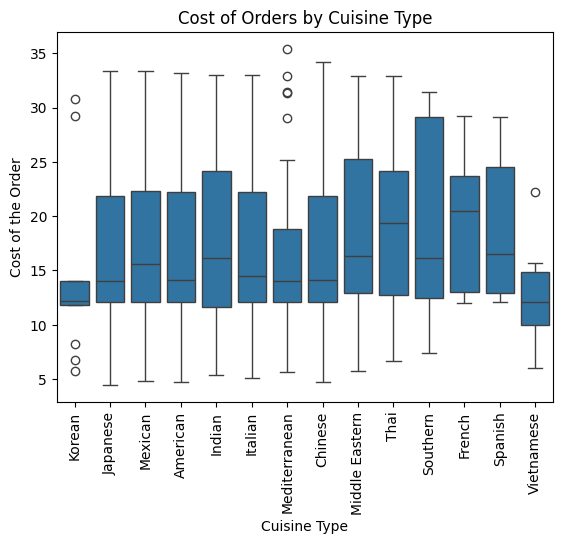

In [ ]:
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df)
plt.xticks(rotation=90)
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of the Order')
plt.title('Cost of Orders by Cuisine Type')

Text(0.5, 1.0, 'Total Cost of Orders by Restaurant')

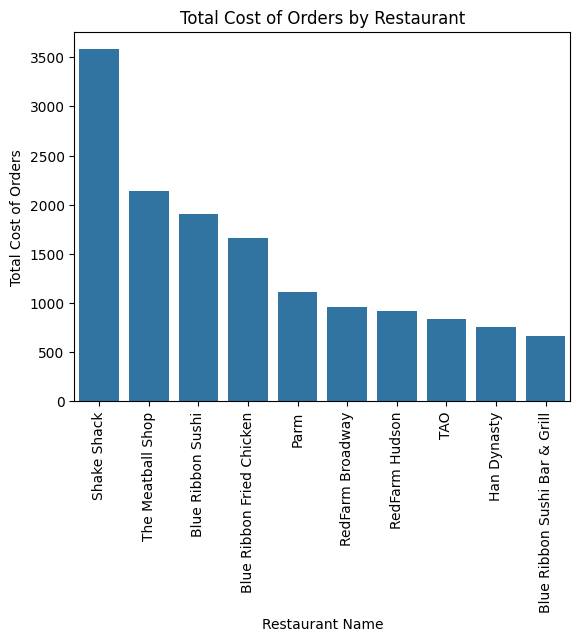

In [ ]:

aggregated_data = df.groupby(['restaurant_name'])['cost_of_the_order'].sum().reset_index()
aggregated_data = aggregated_data.sort_values(by='cost_of_the_order', ascending=False).head(10)
sns.barplot(x='restaurant_name', y='cost_of_the_order', data=aggregated_data)
plt.xticks(rotation=90)
plt.xlabel('Restaurant Name')
plt.ylabel('Total Cost of Orders')
plt.title('Total Cost of Orders by Restaurant')

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code here
data_with_rating = df[df.rating != 'Not given']
data_with_rating.loc[:,'rating'] = data_with_rating['rating'].astype('int')
offer_data = data_with_rating[data_with_rating['rating'] >= 4]
aggregated_rate = offer_data.groupby(['restaurant_name'])['rating'].count().reset_index()
aggregated_rate = aggregated_rate.sort_values(by='rating', ascending=False)
print(aggregated_rate[aggregated_rate['rating']>=50])

               restaurant_name  rating
112                Shake Shack     110
126          The Meatball Shop      74
17           Blue Ribbon Sushi      57
16   Blue Ribbon Fried Chicken      53


#### Observations:Shake Shack, The Meatball Shop, Blue Ribbon Sushi and Blue Ribbon Fried Chicken are the four restaurant that are eligible for promotional offer


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here
df.loc[df['cost_of_the_order'] >20, 'Order_cost'] = 0.25*df['cost_of_the_order']
df.loc[df['cost_of_the_order'] <5, 'Order_cost'] = 0.15*df['cost_of_the_order']
net_revenue = df.groupby(['restaurant_name'])['Order_cost'].sum().reset_index()
net_revenue = net_revenue.sort_values(by='Order_cost', ascending=False)
print(net_revenue.head(5))
print(net_revenue.tail(5))

               restaurant_name  Order_cost
136                Shake Shack      421.71
153          The Meatball Shop      245.12
20   Blue Ribbon Fried Chicken      227.15
21           Blue Ribbon Sushi      187.17
109                       Parm      129.11
        restaurant_name  Order_cost
76          Hunan Manor        0.00
73       Hiroko's Place        0.00
71               Hibino        0.00
65  Hampton Chutney Co.        0.00
89        Lamarca Pasta        0.00


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here
df['total_time'] = df.delivery_time + df.food_preparation_time
percent = (df[df['total_time']>60].count()/df['total_time'].count())*100
print(percent)

order_id                 10.54
customer_id              10.54
restaurant_name          10.54
cuisine_type             10.54
cost_of_the_order        10.54
day_of_the_week          10.54
rating                   10.54
food_preparation_time    10.54
delivery_time            10.54
total_time               10.54
orders_greater_than_20   10.54
>20                       3.00
Order_cost                3.11
dtype: float64


#### Observations: 10.54% of orders take more than 60 mins



### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

Text(0.5, 1.0, 'day of the week vs delivery time')

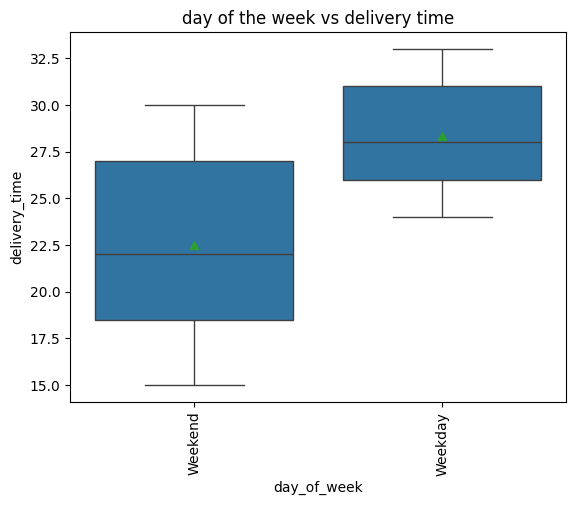

In [ ]:
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df, showmeans=True)
plt.xticks(rotation=90)
plt.xlabel('day_of_week')
plt.ylabel('delivery_time')
plt.title('day of the week vs delivery time')

In [ ]:
df.groupby(['day_of_the_week'])['delivery_time'].mean().reset_index()

,day_of_the_week,delivery_time
0,Weekday,28.34
1,Weekend,22.47


#### Observations: Delivery Time taken on weekdays is more than weekends. Mean delivery time for weekday is 28.34 and for weekend it is around 22.47


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  After charging the restaurants 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars the profit margin for each restaurant is very low.
* On weekdays the delivery time taken is more than weekend.
* American Cuisine is more popular.

### Recommendations:

*  If the company charges less to each restaurants then their profit margin will be high and maybe inturn increase the motivation of restaurants (depends on if the data collected was for a each week or each day)

---